- Consider the basic RCK model with full depreciation

$$
    \max_{c_{t},k_{t+1}} \sum_{t=0}^{\infty} \ln c_{t}
$$
subject to
$$
    c_{t} + k_{t+1} \leq k_{t}^{\theta}
$$
given $k_{0}$.

Let $\beta=.96$ and $\theta=.36$.

1. Write down the Bellman equation.

2. Let V(k) be the value function and conjecture $V(k) = A + B \ln k$. Use the guess-and-verify method to solve for the value function analytically.

3. Assume $k\in[0.3\bar{k},2.0\bar{k}]$ ($\bar{k}$ is the steady state of $k$).  Use the method of successive approximation to solve for the value function numerically.

4. Compare the results in 2 and 3.

In [3]:
# parameters
β = 0.96
θ = 0.36
δ = 1.0

# steady state
kss = (θ*β/(1-β*(1-δ)))^(1/(1-θ))
css = kss^θ-δ*kss

# set grid
nk = 1001
kgrid = collect(range(0.3*kss,stop=2.0*kss,length=nk))

# analytical solution with del = 1

B = θ/(1-θ*β)
A = (log(1/(1+β*B))+β*B*log(β*B/(1+β*B)))/(1-β)
vvec = A .+ B*log.(kgrid)
gvec = θ*β*kgrid.^θ
println([A,B])

[-24.628676418335267, 0.550122249388753]


In [3]:
# 0. construct the current utility
umat = zeros(nk,nk)
for ik in 1:nk
    for jk in 1:nk
        
        [...]
        
        if cnow>0
            # if c >0, the utility value is log(c)
            umat[ik,jk] = log(cnow)
        else
            # if c<=0, the utility value is set so that the index j is never chosen. 
            umat[ik,jk] = -1e+10 # -10000000000 (i.e., ten zeros)
        end
    end
end

In [7]:
gvec0 = zeros(nk)     # policy function
vvec0 = zeros(nk)     # old value function
vvec1 = zeros(nk)     # new value function

diff = 1e+4

while diff>1e-4 # while loop until the condition diff>1e-4 met

    for ik in 1:nk # for each index of the current period, ik=0,...,nk-1

        # 1. find the index of the next period jk so as to maximize the value function
        [...]

    end

    diff  = maximum(abs.(vvec1-vvec0)) # the condition for convergence
    # 2. update the value function       
    vvec0 = copy(vvec1)
    
end

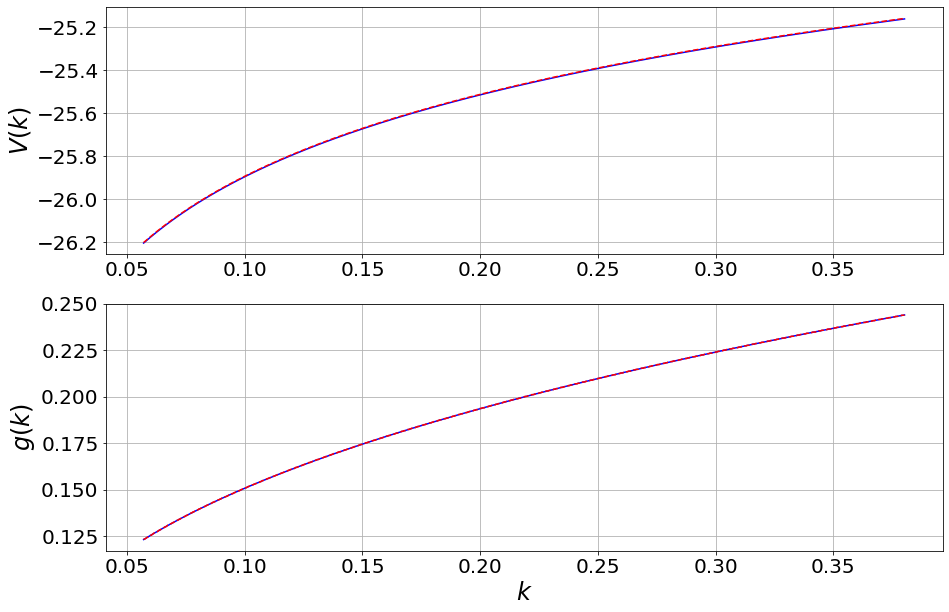

In [10]:
using Plots
plot(
    plot([kgrid kgrid],[vvec0 vvec]),
    plot([kgrid kgrid],[gvec0 gvec]),
    layout=(2,1),size=(800,600))